# Recognising handwritten digits on MNIST dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data/mnist_train.csv')

In [3]:
print(df.shape)

(60000, 785)


In [4]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [5]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [7]:
x=data[:,1:]
y=data[:,0]
print(x.shape, y.shape)

(60000, 784) (60000,)


In [8]:
split=int(0.8*x.shape[0])
print(split)

x_train=x[:split,:]
y_train=y[:split]

x_test=x[split:,:]
y_test=y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


In [9]:
def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

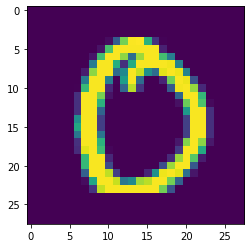

0


In [10]:
drawimg(x_train[88])
print(y_train[88])

In [11]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,querypoint,k=5):
    vals=[]
    m=x.shape[0]
    for i in range(m):
        d=dist(querypoint,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1], return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

In [12]:
pred=knn(x_train,y_train,x_test[999])
print(int(pred))

6


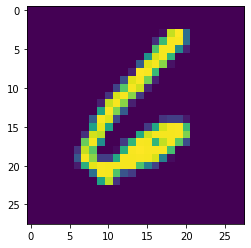

6


In [13]:
drawimg(x_test[999])
print(y_test[999])